<a href="https://colab.research.google.com/github/priyanka26112005/skill-craft-technology/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

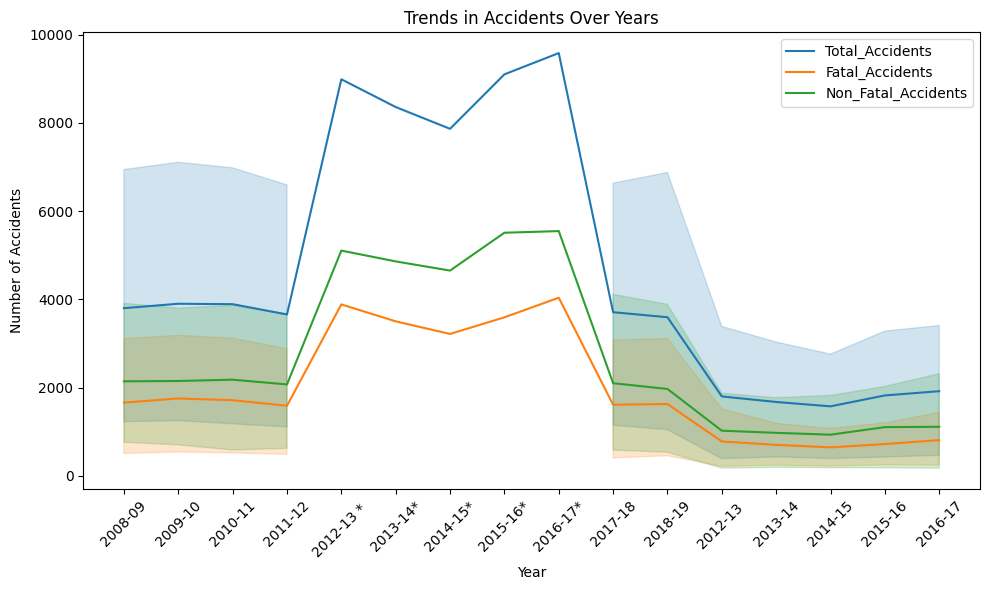

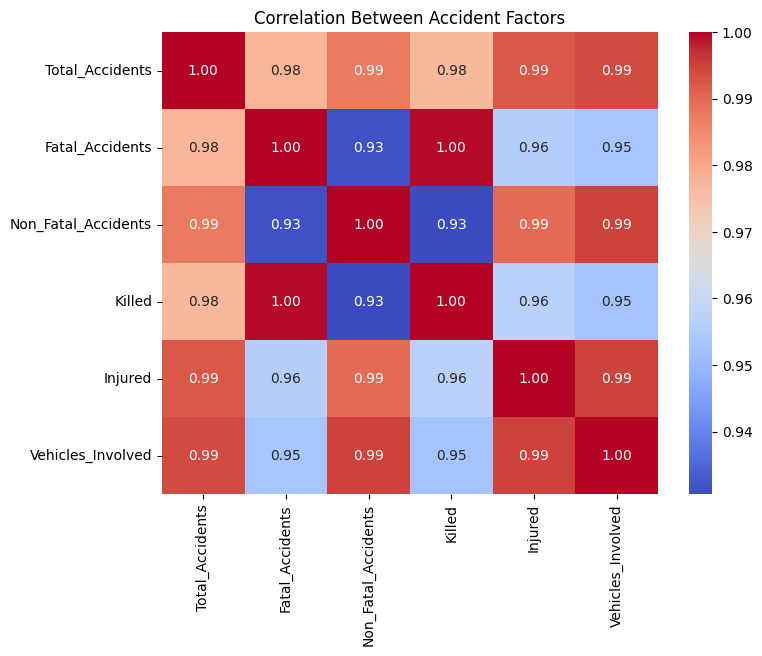

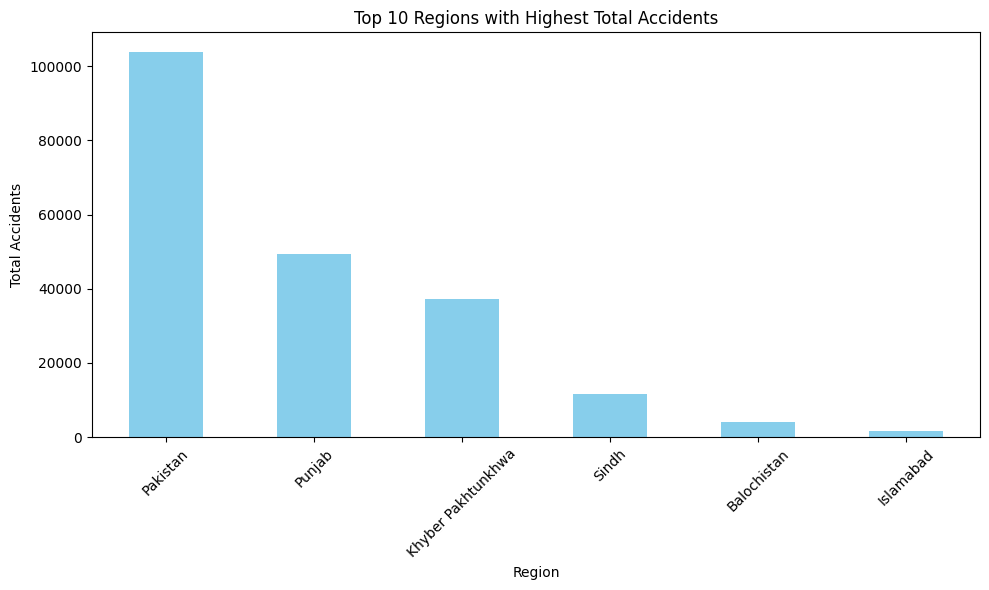

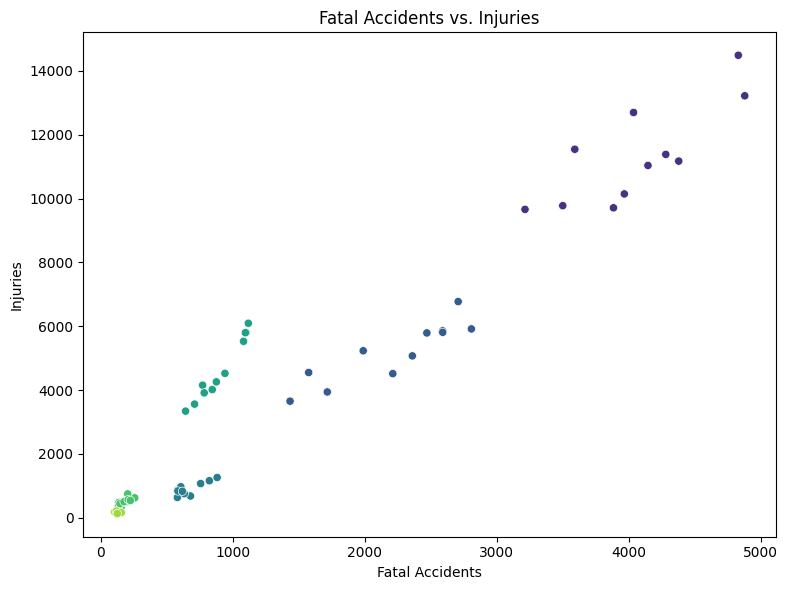

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
file_path = '/content/cleaned_traffic_accidents.csv'
data = pd.read_csv(file_path)

# Remove the first row (column descriptions)
cleaned_data = data.iloc[1:].copy()

# Convert numeric columns to integers
numeric_columns = [
    "Total_Accidents",
    "Fatal_Accidents",
    "Non_Fatal_Accidents",
    "Killed",
    "Injured",
    "Vehicles_Involved",
]

for col in numeric_columns:
    cleaned_data[col] = cleaned_data[col].str.replace(",", "").astype(int)

# Accident trends over years
plt.figure(figsize=(10, 6))
for col in ["Total_Accidents", "Fatal_Accidents", "Non_Fatal_Accidents"]:
    sns.lineplot(x=cleaned_data["Year"], y=cleaned_data[col], label=col)

plt.title("Trends in Accidents Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap for correlation analysis
plt.figure(figsize=(8, 6))
correlation_matrix = cleaned_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Accident Factors")
plt.show()

# Top regions with highest total accidents
top_regions = cleaned_data.groupby("Region")["Total_Accidents"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_regions.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Regions with Highest Total Accidents")
plt.xlabel("Region")
plt.ylabel("Total Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot for fatalities vs. injuries
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=cleaned_data["Fatal_Accidents"],
    y=cleaned_data["Injured"],
    hue=cleaned_data["Region"],
    palette="viridis",
    legend=False
)
plt.title("Fatal Accidents vs. Injuries")
plt.xlabel("Fatal Accidents")
plt.ylabel("Injuries")
plt.tight_layout()
plt.show()
